## Implementing the maximum subarray algorithm seen in CLRS 4.1

### two components for the divide and conquer algorithm:

1. function find_max_crossing_subarray:
-The task which finds a maximum subarray that crosses a midpoint of an array, and 

2. function 
-Recursively applies this task to a large array

### brute force algorithm

### TO DO : linear run time algorithm

In [2]:
import math
# print math.floor((1+4)/2) #gives 2.o
# by default, should take the floor when integers are used:
print '5/2 equals ', 5/2
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

5/2 equals  2


/Users/stephanie/anaconda3/envs/snakes/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
range(5,10) #reminding myself how range works

[5, 6, 7, 8, 9]

In [4]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = -float("inf")
    test_sum = 0
    #we actually want this to include the mid and the 0, so we do low-1 in range()
    for i in range(mid,low-1,-1):
        #print 'i=',i
        test_sum = test_sum + A[i]
        if test_sum > left_sum :
            left_sum = test_sum
            max_left = i
    right_sum = -float("inf")
    test_sum = 0
    #again we want to include the highest index, so say high+1 here in range()
    for j in range(mid+1,high+1):
        #print 'j=',j
        test_sum = test_sum + A[j]
        if test_sum > right_sum :
            right_sum = test_sum
            max_right = j
    return [max_left, max_right, left_sum + right_sum]


In [5]:
def find_max_subarray(A, low, high):
    if high == low:
        return([low, high, A[low]])
    else:
        mid = (low + high) / 2 # note since these are integers, odd#/2 will give the floor
        [left_low, left_high, left_sum] = find_max_subarray(A, low, mid)
        [right_low, right_high, right_sum] = find_max_subarray(A, mid+1, high)
        [cross_low, cross_high, cross_sum] = find_max_crossing_subarray(A, low, mid, high)
        
        if left_sum >= right_sum and left_sum >= cross_sum:
            return [left_low, left_high, left_sum]
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return [right_low, right_high, right_sum]
        else:
            return [cross_low, cross_high, cross_sum]

In [32]:
def brute_force(A):
    left = 0 #for storing the left index for the current best pair
    right = 0 #for storing the right index for the current best pair
    max_profit = -float("inf") #current max profit
    cur_profit = 0 #current profit
    for i in range(len(A)):
        # only go through the j's if j is larger than i (to the right of i)
        for j in range(len(A)):
            if j > i:
                cur_profit = A[j]-A[i]
                if cur_profit > max_profit:
                    max_profit = cur_profit
                    left = i
                    right = j
    return [left, right, max_profit]

A (price) :  [86, 29, 96, 55, 46, 66, 25, 27, 48, 31, 71, 48, 45, 35, 30, 75, 93, 42, 83, 38, 79, 31, 62, 47, 90, 80, 19, 19, 52, 29, 31, 97, 96, 11, 12, 67, 97, 91, 73, 78, 54, 55, 88, 19, 72]
44
B (change in price) :  [-57, 67, -41, -9, 20, -41, 2, 21, -17, 40, -23, -3, -10, -5, 45, 18, -51, 41, -45, 41, -48, 31, -15, 43, -10, -61, 0, 33, -23, 2, 66, -1, -85, 1, 55, 30, -6, -18, 5, -24, 1, 33, -69, 53]


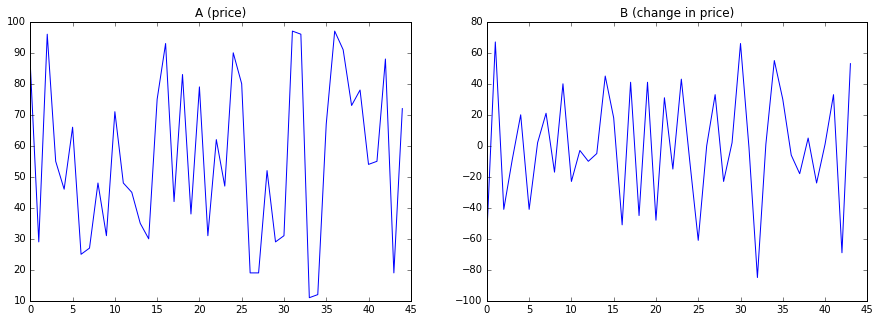

In [7]:
# This cell creates an array on which to test our algorithm

seed=111
random.seed(seed)
n_elements=45
# make A a list of n random integers ranging from 10 to 100
A = [random.randint(10, 101) for n in range(n_elements)]
print 'A (price) : ', A

# define B as the difference between i and i+1 for all i in A
B = []
for i in range(len(A)-1):
    B.append(A[i+1]-A[i])

print len(B)
print 'B (change in price) : ', B

# plot A and B
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(45),A)
ax1.set_title('A (price)')
ax2.plot(range(44),B)
ax2.set_title('B (change in price)')
f.set_size_inches(15,5)

In [8]:
# test the algorithm on small array B[0:10]
print 'testing algorithm on first 10 elements of B : '
print B[0:10]
[l_cross_ind, r_cross_ind, profit_cross] = find_max_crossing_subarray(B, 0, 4, 9)
# note the 0, 4 , 9 splits into 2 subarrays with 5 elements each 0:4 and 5:9 inclusive
print 'you should buy at index ', l_cross_ind
print 'you should sell at index ', r_cross_ind
print 'so your profit will be ', profit_cross

testing algorithm on first 10 elements of B : 
[-57, 67, -41, -9, 20, -41, 2, 21, -17, 40]
you should buy at index  1
you should sell at index  9
so your profit will be  42


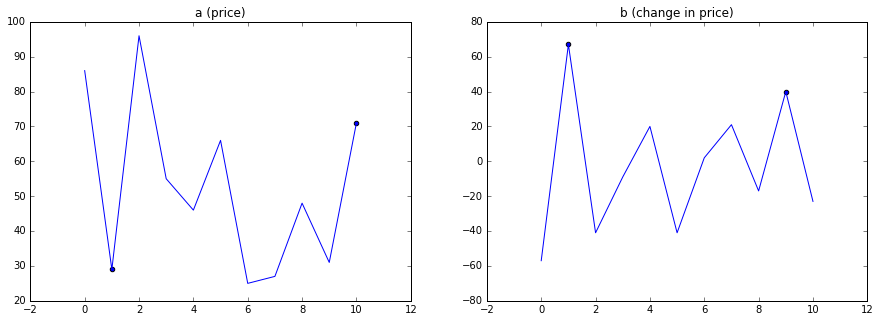

In [9]:
# now plot where to buy and sell on the plots for A and B (small arrays)
a=A[:11]
b=B[:11]
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(len(a)),a)
ax1.set_title('a (price)')
ax1.scatter(l_cross_ind, a[l_cross_ind])
ax1.scatter(r_cross_ind+1, a[r_cross_ind+1] ) #add one to right index for A array since you want to sell after the change

ax2.plot(range(len(b)),b)
ax2.set_title('b (change in price)')
ax2.scatter(l_cross_ind, b[l_cross_ind])
ax2.scatter(r_cross_ind, b[r_cross_ind] )
f.set_size_inches(15,5)

In [23]:
len(B)

44

In [24]:
len(A)

45

In [10]:
# now test on the large array:
[left_index, right_index, profit] = find_max_subarray(B, 0, len(B)-1)
print 'left index : ', left_index
print 'right index : ', right_index
print 'profit : ', profit

left index :  33
right index :  35
profit :  86


In [33]:
# check that brute force does same thing as divide and conquer algorithm
[left_index, right_index, profit] = brute_force(A)
print 'left index : ', left_index
print 'right index : ', right_index
print 'profit : ', profit

left index :  33
right index :  36
profit :  86


In [31]:
A[31]-A[33]

86

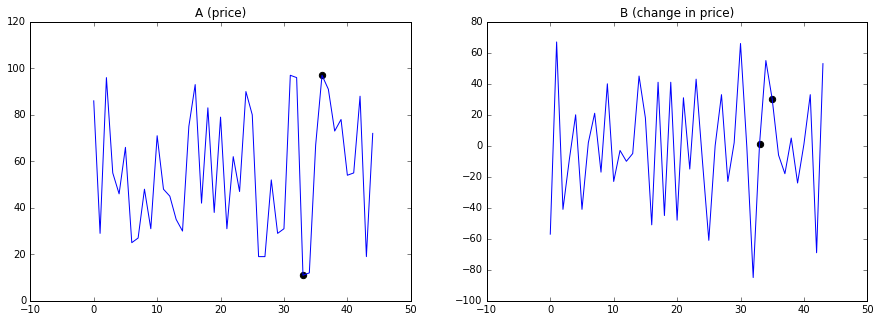

In [11]:
# now plot where to buy and sell on the plots for A and B
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(len(A)),A)
ax1.set_title('A (price)')
ax1.scatter(left_index, A[left_index], s=40, c='black')
ax1.scatter(right_index+1,A[right_index+1], s=40, c='black')

ax2.plot(range(len(B)),B)
ax2.set_title('B (change in price)')
ax2.scatter(left_index, B[left_index], s=40, c='black')
ax2.scatter(right_index,B[right_index], s=40, c='black' )
f.set_size_inches(15,5)

### combine the creation of the array, running the function, and plotting the result in one wrapper function 'test_function'. default values for arguments seed and length will give the same results as above.

left index :  33
right index :  35
profit :  86


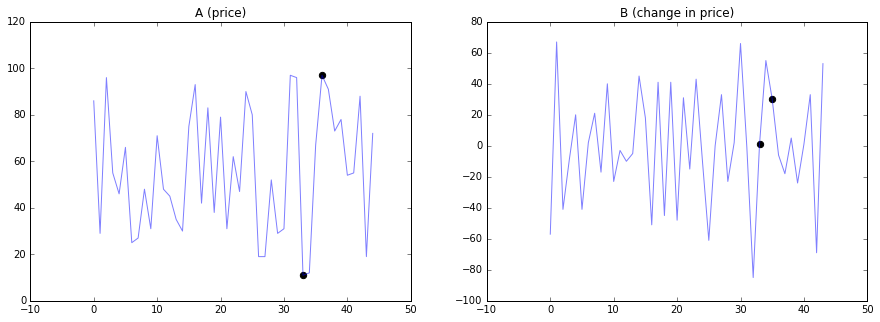

In [12]:
def test_function(seed=111,n_elements=45):
    random.seed(seed)
    A = [random.randint(10, 101) for n in range(n_elements)]
    #define B as the difference between i and i+1 for all i in A
    B = []
    for i in range(len(A)-1):
        B.append(A[i+1]-A[i])
    [left_index, right_index, profit] = find_max_subarray(B, 0, len(B)-1)
    print 'left index : ', left_index
    print 'right index : ', right_index
    print 'profit : ', profit
    # now plot where to buy and sell on the plots for A and B
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(range(len(A)),A, alpha=.5)
    ax1.set_title('A (price)')
    ax1.scatter(left_index, A[left_index], s=40, c='black')
    ax1.scatter(right_index+1,A[right_index+1], s=40, c='black' )

    ax2.plot(range(len(B)),B,alpha=.5)
    ax2.set_title('B (change in price)')
    ax2.scatter(left_index, B[left_index], s=40, c='black')
    ax2.scatter(right_index,B[right_index], s=40, c='black' )
    f.set_size_inches(15,5)
test_function()

left index :  30
right index :  42
profit :  89


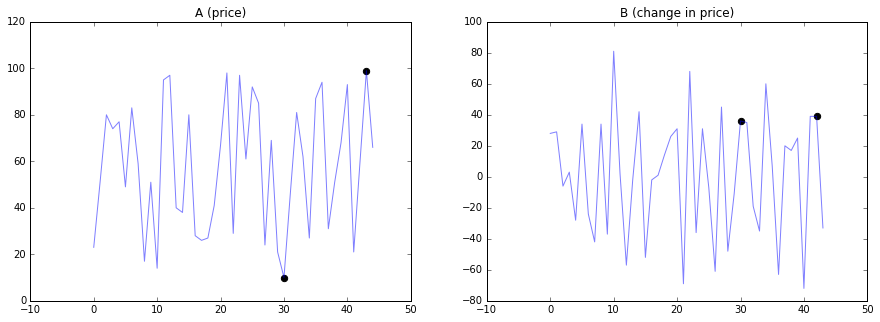

In [13]:
test_function(seed=100)

left index :  204
right index :  214
profit :  91


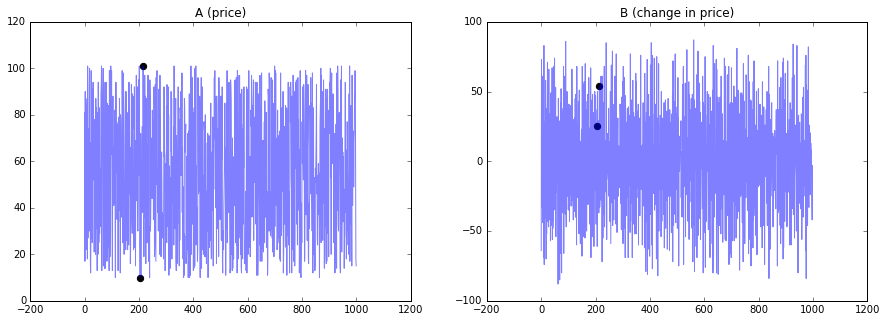

In [14]:
test_function(seed=999, n_elements=1000)

left index :  34
right index :  167
profit :  91


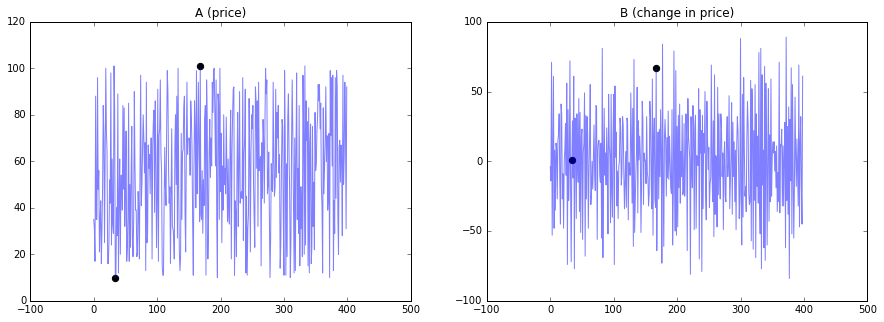

In [15]:
test_function(seed=232, n_elements=400)

left index :  5
right index :  16
profit :  91


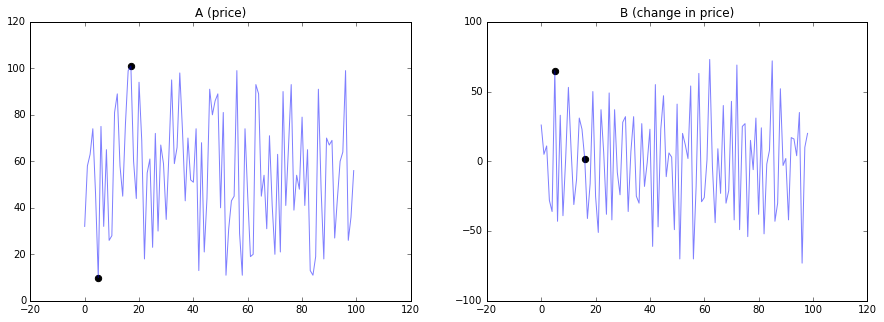

In [16]:
test_function(seed=332, n_elements=100)

In [17]:
# learning about bitwise operators lol
1 >= 2 & 0 >= -1
(1 ^ 5)
# 001 1
# 010 2
# 011 3
# 100 4
# 101 5
# 110 6
# 111 7

4